In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

# import data

In [3]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1GTup48HKTMqT9ZWI02vG65thl7zEBPLK')
df.head()

,Month,data science: (United States)
0,2004-01,17
1,2004-02,13
2,2004-03,11
3,2004-04,6
4,2004-05,6


# data preprocessing

In [5]:
# format the dataframe as required by Facabook Prophet
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2004-01-01,17
1,2004-02-01,13
2,2004-03-01,11
3,2004-04-01,6
4,2004-05-01,6


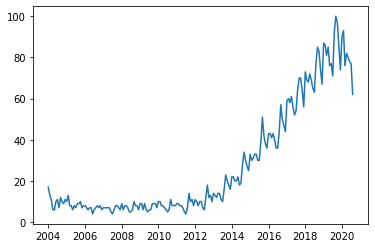

In [7]:
plt.plot(df['ds'],df['y'])

# build model

In [9]:
train = df.iloc[:176]
test = df.iloc[176:]

model = Prophet(seasonality_mode='multiplicative',interval_width=0.95)
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -14.5397


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       512.612     0.0369695       286.114           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       517.559   0.000475654       109.193   1.062e-06       0.001      198  LS failed, Hessian reset 
     199       520.087   0.000300536       80.8026      0.5137      0.5137      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       520.335   0.000101429       39.9896   2.484e-06       0.001      359  LS failed, Hessian reset 
     299       520.441   0.000282948       33.6512      0.6875      0.6875      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       520.521   3.12689e-07       21.9772   7.788e-09       0.001      592  LS failed, Hessian reset 
     368       520.521   3.95758e-08  

# model prediction

In [10]:
# create a placeholder dataframe that will eventually hold the predictions

horizon=36
future = model.make_future_dataframe(36,freq='MS')

In [11]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
207,2021-04-01,109.196977,102.925851,115.539102
208,2021-05-01,102.418519,96.492358,108.660912
209,2021-06-01,93.912361,88.206168,99.797839
210,2021-07-01,93.489536,87.387955,99.617783
211,2021-08-01,113.117309,106.138111,120.323027


# plot forecast

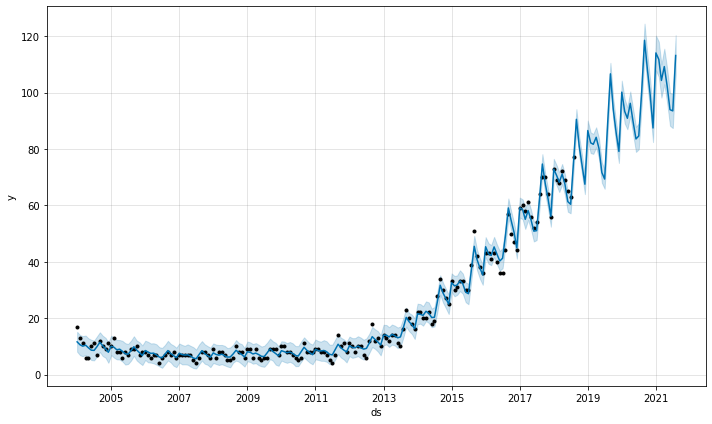

In [13]:
model.plot(forecast);

# evaluate model

/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


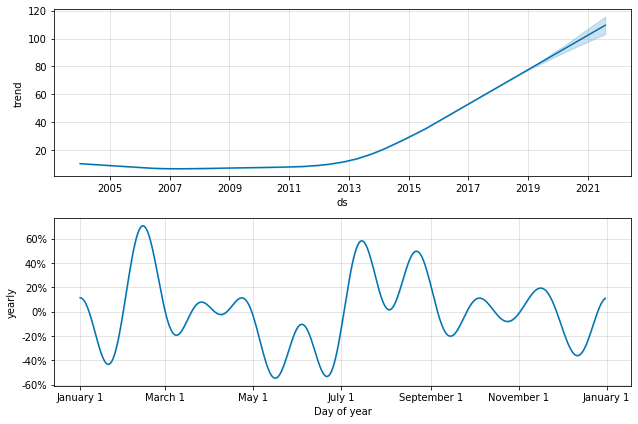

In [14]:
# Plot the trend and yearly seasonality of the time series
model.plot_components(forecast);

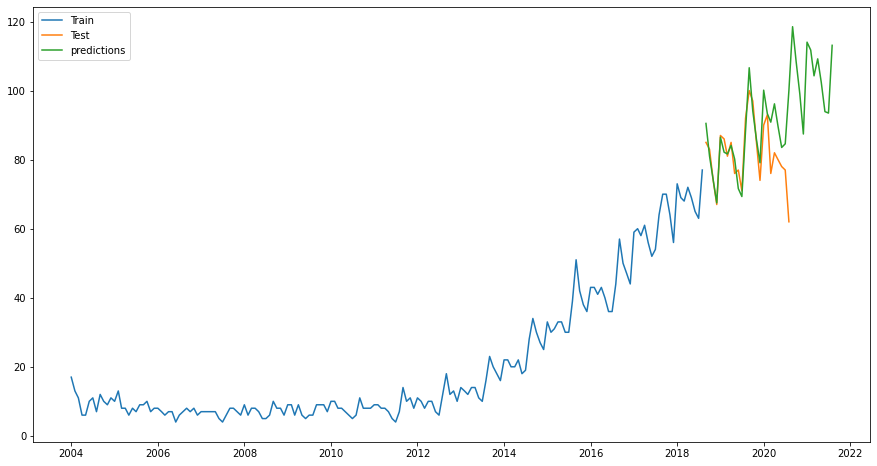

In [15]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

In [17]:
# cross-validation

df_cv = cross_validation(model, initial=f'{365 * 5} days', horizon='365 days', period='180 days')

INFO:fbprophet:Making 18 forecasts with cutoffs between 2009-03-16 00:00:00 and 2017-08-01 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]


Initial log joint probability = -74.4363
Iteration  1. Log joint probability =    2.35826. Improved by 76.7945.
Iteration  2. Log joint probability =    38.5244. Improved by 36.1662.
Iteration  3. Log joint probability =    52.1945. Improved by 13.67.
Iteration  4. Log joint probability =    52.2355. Improved by 0.0410065.
Iteration  5. Log joint probability =     52.311. Improved by 0.0754884.
Iteration  6. Log joint probability =    52.3385. Improved by 0.0275708.
Iteration  7. Log joint probability =    52.3508. Improved by 0.0122256.
Iteration  8. Log joint probability =    52.4068. Improved by 0.0560382.
Iteration  9. Log joint probability =    52.5164. Improved by 0.109559.
Iteration 10. Log joint probability =    52.5437. Improved by 0.0273446.
Iteration 11. Log joint probability =    52.5585. Improved by 0.0147816.
Iteration 12. Log joint probability =    52.8673. Improved by 0.308796.
Iteration 13. Log joint probability =     53.714. Improved by 0.846713.
Iteration 14. Log jo


Initial log joint probability = -81.496
Iteration  1. Log joint probability =    23.1623. Improved by 104.658.
Iteration  2. Log joint probability =    62.7145. Improved by 39.5522.
Iteration  3. Log joint probability =    80.7429. Improved by 18.0284.
Iteration  4. Log joint probability =    114.431. Improved by 33.6877.
Iteration  5. Log joint probability =    121.972. Improved by 7.54094.
Iteration  6. Log joint probability =    122.017. Improved by 0.0457907.
Iteration  7. Log joint probability =    122.158. Improved by 0.140799.
Iteration  8. Log joint probability =    126.689. Improved by 4.53046.
Iteration  9. Log joint probability =    127.237. Improved by 0.548177.
Iteration 10. Log joint probability =    127.859. Improved by 0.621783.
Iteration 11. Log joint probability =    128.099. Improved by 0.240793.
Iteration 12. Log joint probability =    128.441. Improved by 0.341245.
Iteration 13. Log joint probability =    128.531. Improved by 0.0904403.
Iteration 14. Log joint pro


Initial log joint probability = -86.8825
Iteration  1. Log joint probability =    63.3911. Improved by 150.274.
Iteration  2. Log joint probability =    94.0932. Improved by 30.7021.
Iteration  3. Log joint probability =    115.559. Improved by 21.4659.
Iteration  4. Log joint probability =    135.661. Improved by 20.1019.
Iteration  5. Log joint probability =     148.19. Improved by 12.5294.
Iteration  6. Log joint probability =    148.204. Improved by 0.0140086.
Iteration  7. Log joint probability =    148.227. Improved by 0.0228595.
Iteration  8. Log joint probability =    148.254. Improved by 0.0266894.
Iteration  9. Log joint probability =    148.267. Improved by 0.0133193.
Iteration 10. Log joint probability =    148.271. Improved by 0.00382881.
Iteration 11. Log joint probability =    148.304. Improved by 0.0326003.
Iteration 12. Log joint probability =    148.319. Improved by 0.0157811.
Iteration 13. Log joint probability =    148.645. Improved by 0.325574.
Iteration 14. Log j


Initial log joint probability = -98.6292
Iteration  1. Log joint probability =   -4.46127. Improved by 94.168.
Iteration  2. Log joint probability =    28.7323. Improved by 33.1935.
Iteration  3. Log joint probability =    81.9493. Improved by 53.2171.
Iteration  4. Log joint probability =    115.643. Improved by 33.6939.
Iteration  5. Log joint probability =     121.71. Improved by 6.06716.
Iteration  6. Log joint probability =     123.27. Improved by 1.55974.
Iteration  7. Log joint probability =     126.09. Improved by 2.81996.
Iteration  8. Log joint probability =    127.324. Improved by 1.23372.
Iteration  9. Log joint probability =     128.58. Improved by 1.25658.
Iteration 10. Log joint probability =    129.391. Improved by 0.810887.
Iteration 11. Log joint probability =    131.272. Improved by 1.88119.
Iteration 12. Log joint probability =    131.394. Improved by 0.121143.
Iteration 13. Log joint probability =    131.656. Improved by 0.262702.
Iteration 14. Log joint probabili


Initial log joint probability = -109.847
Iteration  1. Log joint probability =    45.5232. Improved by 155.37.
Iteration  2. Log joint probability =    115.782. Improved by 70.2584.
Iteration  3. Log joint probability =    142.941. Improved by 27.1597.
Iteration  4. Log joint probability =    155.778. Improved by 12.8367.
Iteration  5. Log joint probability =    155.811. Improved by 0.0332363.
Iteration  6. Log joint probability =    171.338. Improved by 15.5265.
Iteration  7. Log joint probability =    171.539. Improved by 0.200813.
Iteration  8. Log joint probability =    171.951. Improved by 0.412684.
Iteration  9. Log joint probability =    172.395. Improved by 0.443913.
Iteration 10. Log joint probability =    172.649. Improved by 0.253699.
Iteration 11. Log joint probability =    173.223. Improved by 0.574338.
Iteration 12. Log joint probability =    174.545. Improved by 1.32202.
Iteration 13. Log joint probability =    174.672. Improved by 0.126453.
Iteration 14. Log joint prob


Initial log joint probability = -110.799
Iteration  1. Log joint probability =    35.4086. Improved by 146.207.
Iteration  2. Log joint probability =    64.4865. Improved by 29.0778.
Iteration  3. Log joint probability =    109.134. Improved by 44.6479.
Iteration  4. Log joint probability =    109.167. Improved by 0.0327148.
Iteration  5. Log joint probability =    109.226. Improved by 0.0585338.
Iteration  6. Log joint probability =    110.329. Improved by 1.10293.
Iteration  7. Log joint probability =    111.584. Improved by 1.25581.
Iteration  8. Log joint probability =    112.656. Improved by 1.07123.
Iteration  9. Log joint probability =    114.041. Improved by 1.38542.
Iteration 10. Log joint probability =    114.894. Improved by 0.853171.
Iteration 11. Log joint probability =    114.935. Improved by 0.0413335.
Iteration 12. Log joint probability =    117.043. Improved by 2.10784.
Iteration 13. Log joint probability =    118.185. Improved by 1.14134.
Iteration 14. Log joint prob

Initial log joint probability = -10.809
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       196.333    6.8306e-05       58.8084      0.3685           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       196.629    0.00373894         65.11   4.335e-05       0.001      200  LS failed, Hessian reset 
     178       196.812   2.92561e-05        65.866   4.325e-07       0.001      322  LS failed, Hessian reset 
     199       196.814   2.14554e-07       58.5968           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       196.814   3.82824e-06       75.9382   6.056e-08       0.001      440  LS failed, Hessian reset 
     263       196.815   1.63653e-09       76.9545     0.06862     0.06862      477   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was b

Initial log joint probability = -13.083
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       309.762   0.000736571       49.1369           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150        311.74    0.00698966       217.267   6.995e-05       0.001      231  LS failed, Hessian reset 
     163        312.01   0.000106178       37.8794    3.14e-06       0.001      287  LS failed, Hessian reset 
     199       312.057   0.000122433       30.4319           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       312.201   0.000551514       67.7339   7.826e-06       0.001      423  LS failed, Hessian reset 
     299       312.295   0.000186254       50.4124          10           1      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

Initial log joint probability = -15.0898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       448.439   0.000717085       180.811   8.255e-06       0.001      148  LS failed, Hessian reset 
      99       451.424    0.00636093       151.964      0.3602           1      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       454.179    0.00158572       329.837   1.564e-05       0.001      230  LS failed, Hessian reset 
     182       456.027   0.000603546       103.929   1.681e-05       0.001      354  LS failed, Hessian reset 
     199       456.244   0.000880018       39.7178       1.936      0.1936      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       456.544   0.000576101       125.674   1.222e-05       0.001      464  LS failed, Hessian reset 
     251         456.6   1.55486e-05       31.3479   3.742e-07   

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,18.846968,4.341309,3.575419,0.164590,0.141620,0.428571
1,40 days,20.578612,4.536366,3.836590,0.175602,0.147261,0.380952
2,42 days,19.173775,4.378787,3.687829,0.166502,0.147261,0.380952
3,45 days,20.271792,4.502421,3.837286,0.166474,0.147261,0.333333
4,46 days,18.621556,4.315270,3.587184,0.159549,0.141620,0.380952


In [21]:
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,18.846968,4.341309,3.575419,0.164590,0.141620,0.428571
1,40 days,20.578612,4.536366,3.836590,0.175602,0.147261,0.380952
2,42 days,19.173775,4.378787,3.687829,0.166502,0.147261,0.380952
3,45 days,20.271792,4.502421,3.837286,0.166474,0.147261,0.333333
4,46 days,18.621556,4.315270,3.587184,0.159549,0.141620,0.380952


/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


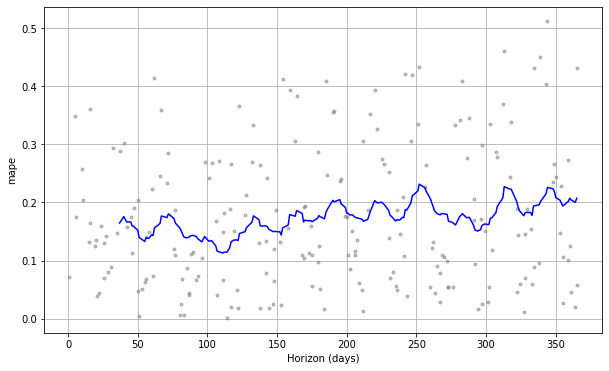

In [20]:
plot_cross_validation_metric(df_cv, metric='mape');